# Converting S isotope systematics, and S concentrations
- This notebook shows simple functions for common conversion workflows, e.g., converting from d34 to 34/32S ratios, converting SO3 to S in ppm etc.

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import PySulfSat as ss

## Converting between different forms of S isotope notation
- S isotopes are sometimes quoted in terms of $\delta^{32}$S, where the $\frac{32S}{34S}$ ratio of the sample has been referenced to a community standard. 
- In the literature, the most commmonly used standard is the Canyon Diablo Troilite (CDT). A lot of papers seem to use the ratio for the Vienna-CDT (VCDT) quoted in Ding et al. (2001, https://doi.org/10.1016/S0016-7037(01)00611-1), of 1/22.6436, which is what these functions use by default (although any ratio can be entered). 

In [14]:
# Lets load in some S data from Lerner et al. (2021)
df=pd.read_excel('Sulfur_Conversions.xlsx')
df.head()

,δ34S,δ34S SEE,34S/32S ratio raw measured,34S/32S ratio (1SE) raw measured,34S/32S ratio IMF,SEE_scaled,S_ppm
0,-0.246318,0.467748,0.044336,0.000016,0.044153,0.000021,1000
1,-2.816959,0.921352,0.044222,0.000039,0.044039,0.000041,1100
2,-2.546365,0.767581,0.044234,0.000031,0.044051,0.000034,900
3,-0.584560,0.723941,0.044321,0.000029,0.044138,0.000032,500
4,0.317419,0.450185,0.044361,0.000015,0.044178,0.000020,400


### Lets first convert from 34/32S to d34S using the default standard value

In [15]:
d34_std=ss.convert_3432S_to_d34(S3432=df['34S/32S ratio IMF'])
d34_std

0   -0.220035
1   -2.790743
2   -2.520142
3   -0.558286
4    0.343717
5   -0.490636
6   -1.144588
7   -0.084735
Name: 34S/32S ratio IMF, dtype: float64

## And lets conver this back 

In [16]:
d3432S_calc=ss.convert_d34_to_3432S(d34S=d34_std)
d3432S_calc

0    0.044153
1    0.044039
2    0.044051
3    0.044138
4    0.044178
5    0.044141
6    0.044112
7    0.044159
Name: 34S/32S ratio IMF, dtype: float64

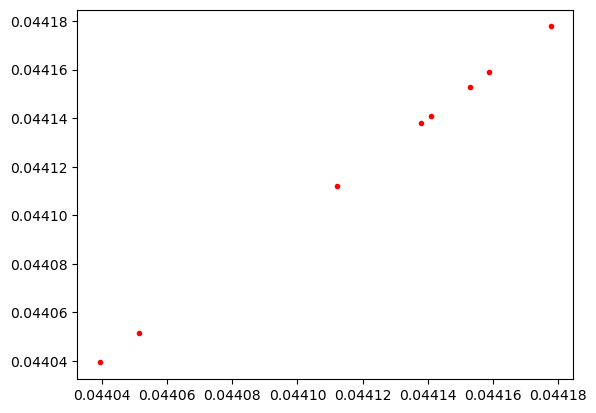

In [18]:
## Lets check
plt.plot(df['34S/32S ratio IMF'], d3432S_calc, '.r')

### Lets convert S concentrations around
- You have to enter S concentration of the form you have, and it returns a dataframe of all the other possible forms. 

In [19]:
df=ss.convert_S_types(S_ppm=df['S_ppm'])
df

,S_wt,S_ppm,SO2_wt,SO2_ppm,SO3_wt,SO3_ppm,SO4_wt,SO4_ppm
0,0.100,1000.0,0.199791,1997.910494,0.249687,2496.865741,0.299582,2995.820989
1,0.110,1100.0,0.219770,2197.701544,0.274655,2746.552316,0.329540,3295.403087
2,0.090,900.0,0.179812,1798.119445,0.224718,2247.179167,0.269624,2696.238890
3,0.050,500.0,0.099896,998.955247,0.124843,1248.432871,0.149791,1497.910494
4,0.040,400.0,0.079916,799.164198,0.099875,998.746297,0.119833,1198.328395
5,0.035,350.0,0.069927,699.268673,0.087390,873.903010,0.104854,1048.537346
6,0.020,200.0,0.039958,399.582099,0.049937,499.373148,0.059916,599.164198
7,0.100,1000.0,0.199791,1997.910494,0.249687,2496.865741,0.299582,2995.820989
